In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path1 = os.path.join("..","data", "mouse_drug_data.csv")
path2 = os.path.join("..","data", "clinicaltrial_data.csv")

In [4]:
mouse_drug_data_df = pd.read_csv(path1)
clinicaltrial_data_df = pd.read_csv(path2)

In [5]:
mouse_drug_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
clinicaltrial_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
merged_data_df = pd.merge(mouse_drug_data_df, clinicaltrial_data_df, on = ["Mouse ID"])
merged_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_df = pd.DataFrame(merged_data_df.groupby(["Drug", "Timepoint"], as_index = False)["Tumor Volume (mm3)"].mean())
rename_mean_tumor_volume_df = mean_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)": "Mean_Tumor_Volume" })
rename_mean_tumor_volume_df

,Drug,Timepoint,Mean_Tumor_Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# We use pandas.groupby[].sem().reset_index()
tumor_volume_standard_error_df = pd.DataFrame(merged_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index())
rename_tumor_volume_standard_error_df = tumor_volume_standard_error_df.rename(columns = {"Tumor Volume (mm3)": "SE_Tumor_Volume"})
rename_tumor_volume_standard_error_df

,Drug,Timepoint,SE_Tumor_Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
# Minor Data Munging to re-format the DataFrame for Mean_Tumor_Volume
# We use pandas.pivot(index, column,values)
reformat_mean_tumorvolume = rename_mean_tumor_volume_df.pivot(index = "Timepoint", columns = "Drug", values = "Mean_Tumor_Volume")
reformat_mean_tumorvolume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [11]:
# Minor Data Munging to re-format the DataFrame for Standard_Error_Tumor_Volume 
# We use pandas.pivot(index, column,values)
reformat_tumor_volume_standard_error_df = rename_tumor_volume_standard_error_df.pivot(index = "Timepoint", columns = "Drug", values = "SE_Tumor_Volume")
reformat_tumor_volume_standard_error_df
    

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


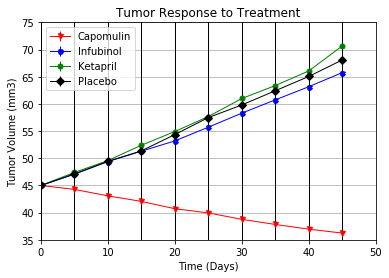

In [12]:
# drug_type = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
fig, ax = plt.subplots()

ax.errorbar(reformat_mean_tumorvolume.index, reformat_mean_tumorvolume["Capomulin"], yerr = reformat_mean_tumorvolume["Capomulin"], 
                       color = "red", marker = "v", markersize = 5, linestyle = "-", linewidth = 1, label = "Capomulin")
ax.errorbar(reformat_mean_tumorvolume.index, reformat_mean_tumorvolume["Infubinol"], yerr = reformat_mean_tumorvolume["Infubinol"], 
                       color = "blue", marker = "X", markersize = 5, linestyle = "-", linewidth = 1, label = "Infubinol")
ax.errorbar(reformat_mean_tumorvolume.index, reformat_mean_tumorvolume["Ketapril"], yerr = reformat_mean_tumorvolume["Ketapril"], 
                       color = "green", marker = "o", markersize = 5, linestyle = "-", linewidth = 1, label = "Ketapril")
ax.errorbar(reformat_mean_tumorvolume.index, reformat_mean_tumorvolume["Placebo"], yerr = reformat_mean_tumorvolume["Placebo"], 
                       color = "black", marker = "D", markersize = 5, linestyle = "-", linewidth = 1, label = "Placebo")

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlim(0,50)
ax.set_ylim(35,75)

ax.grid()
ax.legend()

fig.savefig("../Matplotlib_Challenge/Tumor_Response.png")

#The above graph was based off the four drugs used in the clinical trial and how the tumor volumes of mice decreased/increased while using the given drugs for treatment. As we can see, the Capomulin drug decreased the tumor by volume, compared to the other three drugs. The other three drugs, which included the placebo, had a significant amount of increase over the 45 day period. 



In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites_df = pd.DataFrame(merged_data_df.groupby(["Drug", "Timepoint"], as_index = False)["Metastatic Sites"].mean())
rename_mean_met_sites_df = mean_met_sites_df.rename(columns = {"Metastatic Sites": "Mean_Metastatic_Sites" })
rename_mean_met_sites_df

,Drug,Timepoint,Mean_Metastatic_Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [14]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# We use pandas.groupby[].sem().reset_index()
met_sites_standard_error_df = pd.DataFrame(merged_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().reset_index())
rename_met_sites_standard_error_df = met_sites_standard_error_df.rename(columns = {"Metastatic Sites": "SE_Metastatic_Sites"})
rename_met_sites_standard_error_df

,Drug,Timepoint,SE_Metastatic_Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [15]:
# Minor Data Munging to re-format the DataFrame for Mean_Metastatic_Sites
# We use pandas.pivot(index, column,values)
reformat_mean_met_sites = rename_mean_met_sites_df.pivot(index = "Timepoint", columns = "Drug", values = "Mean_Metastatic_Sites")
reformat_mean_met_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [16]:
# Minor Data Munging to re-format the DataFrame for Standard_Error_Metastatic_Sites
# We use pandas.pivot(index, column,values)
reformat_met_sites_standard_error_df = rename_met_sites_standard_error_df.pivot(index = "Timepoint", columns = "Drug", values = "SE_Metastatic_Sites")
reformat_met_sites_standard_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


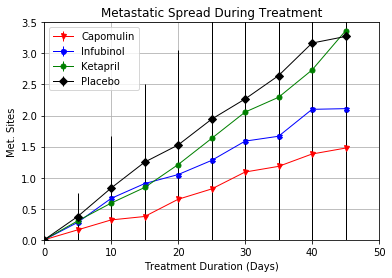

In [17]:
# drug_type = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
fig, ax2 = plt.subplots()

ax2.errorbar(reformat_mean_met_sites.index, reformat_mean_met_sites["Capomulin"], yerr = reformat_mean_met_sites["Capomulin"], 
                      color = "red", marker = "v", markersize = 5, linestyle = "-", linewidth = 1, label = "Capomulin")
ax2.errorbar(reformat_mean_met_sites.index, reformat_mean_met_sites["Infubinol"], yerr = reformat_mean_met_sites["Infubinol"], 
                      color = "blue", marker = "X", markersize = 5, linestyle = "-", linewidth = 1, label = "Infubinol")
ax2.errorbar(reformat_mean_met_sites.index, reformat_mean_met_sites["Ketapril"], yerr = reformat_mean_met_sites["Ketapril"], 
                      color = "green", marker = "o", markersize = 5, linestyle = "-", linewidth = 1, label = "Ketapril")
ax2.errorbar(reformat_mean_met_sites.index, reformat_mean_met_sites["Placebo"], yerr = reformat_mean_met_sites["Placebo"], 
                      color = "black", marker = "D", markersize = 5, linestyle = "-", linewidth = 1, label = "Placebo")

ax2.set_title("Metastatic Spread During Treatment")
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Met. Sites")
ax2.set_xlim(0,50)
ax2.set_ylim(0,3.5)

ax2.grid()
ax2.legend()

fig.savefig("../Matplotlib_Challenge/Metastatic_Spread.png")

#The above graph shows the scatter plot of how the number of metastatic(cancer spreading)sites changes over time for each treatment.This is happening over the span of 45 days. As we can observe, for all four drugs being used, there is an increase of sites over the period of time. Being said that, the Ketapril and Placebo drugs had a higher increase compared to the Capomulin and Infubinol.  

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_df = pd.DataFrame(merged_data_df.groupby(["Drug", "Timepoint"], as_index = False)["Mouse ID"].count())
rename_mice_count_df =mice_count_df.rename(columns = {"Mouse ID": "Mice Count" })
rename_mice_count_df

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [19]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mice_count_df = rename_mice_count_df.pivot(index = "Timepoint", columns = "Drug", values = "Mice Count")
reformat_mice_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


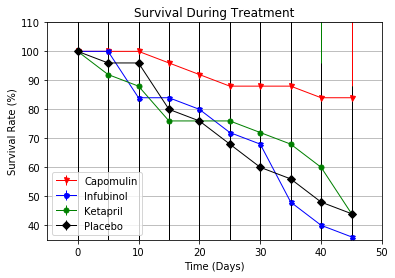

In [20]:
# drug_type = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
# mg--> (mice group)
initial_reformat_mice_count = reformat_mice_count_df.iloc[0,1]
initial_reformat_mice_count_percentage = (reformat_mice_count_df/initial_reformat_mice_count)*100

fig, ax3 = plt.subplots()
ax3.errorbar(initial_reformat_mice_count_percentage.index, initial_reformat_mice_count_percentage["Capomulin"], yerr = initial_reformat_mice_count_percentage["Capomulin"], 
                      color = "red", marker = "v", markersize = 5, linestyle = "-", linewidth = 1, label = "Capomulin")
ax3.errorbar(initial_reformat_mice_count_percentage.index, initial_reformat_mice_count_percentage["Infubinol"], yerr = initial_reformat_mice_count_percentage["Infubinol"], 
                      color = "blue", marker = "X", markersize = 5, linestyle = "-", linewidth = 1, label = "Infubinol")
ax3.errorbar(initial_reformat_mice_count_percentage.index, initial_reformat_mice_count_percentage["Ketapril"], yerr = initial_reformat_mice_count_percentage["Ketapril"], 
                      color = "green", marker = "o", markersize = 5, linestyle = "-", linewidth = 1, label = "Ketapril")
ax3.errorbar(initial_reformat_mice_count_percentage.index, initial_reformat_mice_count_percentage["Placebo"], yerr = initial_reformat_mice_count_percentage["Placebo"], 
                      color = "black", marker = "D", markersize = 5, linestyle = "-", linewidth = 1, label = "Placebo")

ax3.set_title("Survival During Treatment")
ax3.set_xlabel("Time (Days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.set_xlim(-5, 50)
ax3.set_ylim(35,110)

ax3.grid()
ax3.legend(loc = 3)

fig.savefig("../Matplotlib_Challenge/Survival_Rates.png")

#The above graph is a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate). As we can see, throughout the treatment the survival rate of the mice drastically decreases. From the four drugs being used the Infubinol, Ketapril, and the Placebo had definite major drop in terms of percentage. The Capomulin drug kept a much higher survival rate. 

In [26]:
#Calculate the percent changes for each drug
drug_type = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

perc_meanchange =  100 * (reformat_mean_tumorvolume.iloc[-1] - reformat_mean_tumorvolume.iloc[0]) /reformat_mean_tumorvolume.iloc[0]
perc_se_change =  100 * (reformat_tumor_volume_standard_error_df.iloc[-1] - reformat_tumor_volume_standard_error_df.iloc[0]) / reformat_tumor_volume_standard_error_df.iloc[0]

perc_changes_needed =(perc_meanchange["Capomulin"], perc_meanchange["Infubinol"], 
               perc_meanchange["Ketapril"], perc_meanchange["Placebo"])
perc_meanchange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

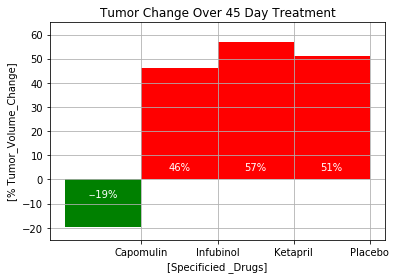

In [46]:
fig, ax = plt.subplots()
per_drug = np.arange(len(perc_changes_needed))  
width = 1
green_rect = ax.bar(per_drug[0], perc_changes_needed[0], width, color = "green")
red_rect = ax.bar(per_drug[1:], perc_changes_needed[1:], width, color = "red")

ax.set_xlabel("[Specificied _Drugs]")
ax.set_ylabel("[% Tumor_Volume_Change]")              
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(per_drug + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-25,65])
ax.grid(True)

def labelred(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 3,
                "%d%%" % float(height),
                ha = "center", va = "bottom", color="white")
        
def labelgreen(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, -8,
                "-%d%%" % float(height),
                ha = "center", va = "bottom", color = "white")

labelred(red_rect)
labelgreen(green_rect)
fig.savefig("TumorChange-45_Day_Treatment.png")